# KNN

In [22]:
from sklearn.datasets import load_iris 

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sn


# Load the data

In [2]:
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Create the Data Frame

In [6]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)


df["target"] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
df.to_csv("./data/IRIS.csv", index = False)

# Plot some Data

In [7]:

df_setosa = df[:50] # the first 50 images are setosasa
df_versicolor = df[50:100]
df_virginica = df[100:150]

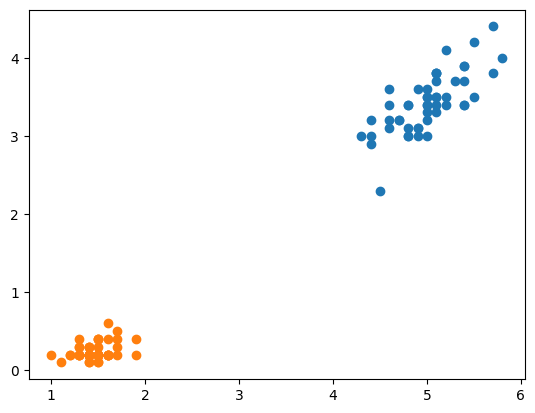

In [8]:
plt.scatter(df_setosa["sepal length (cm)"], df_setosa["sepal width (cm)"])
plt.scatter(df_setosa["petal length (cm)"], df_setosa["petal width (cm)"])

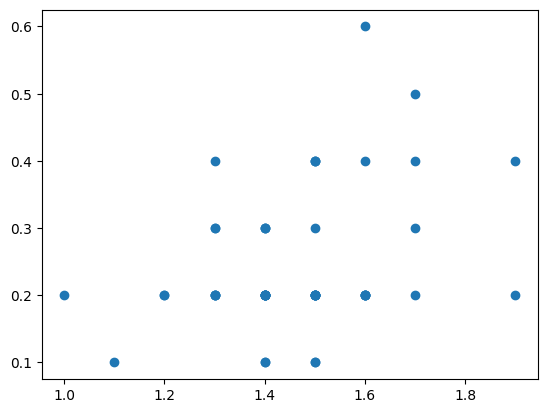

In [9]:
plt.scatter(df_setosa["petal length (cm)"], df_setosa["petal width (cm)"])

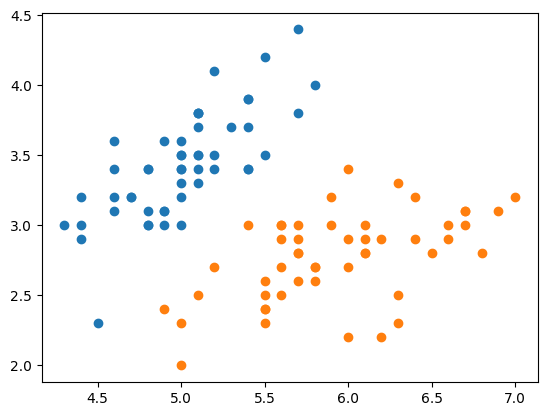

In [10]:
plt.scatter(df_setosa["sepal length (cm)"], df_setosa["sepal width (cm)"]  )
plt.scatter(df_versicolor["sepal length (cm)"], df_versicolor["sepal width (cm)"]  )

# Split the data

## 1. Input and output


In [11]:
X = df.drop(["target"], axis = "columns")
y = df.target

## 2. Train and test split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0)

In [13]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

120
120
30
30


# Build and train the model

In [16]:
# create the model instance
model = KNeighborsClassifier(n_neighbors= 3 )

# train the model
model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

# Scoring

In [17]:
model.score(X_test, y_test)

0.9666666666666667

# Predictions

In [18]:
model.predict([[4.3 , 3.1, 1.7 , 0.4]])  # -> 0 : setosa

c:\Python\Python3114\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

# Confusion Matrix

In [19]:
y_predicted = model.predict(X_test)

In [21]:
cm = confusion_matrix(y_test, y_predicted)

Text(50.722222222222214, 0.5, 'Truth')

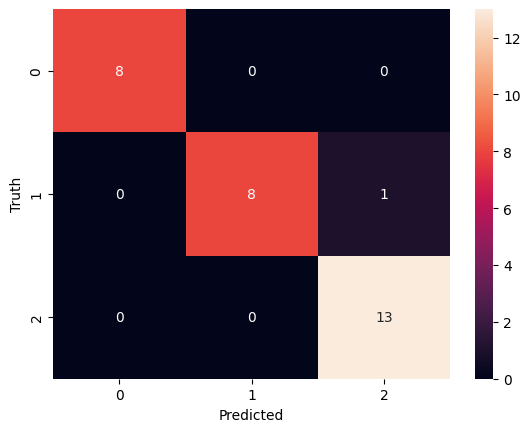

In [24]:
sn.heatmap(cm, annot = True)

plt.xlabel("Predicted")
plt.ylabel("Truth")

# Save the model

In [25]:
import pickle

In [26]:
with open("./models/mdl_knn_iris_v1.pkl", mode= "wb") as file:
    pickle.dump(model, file)